# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values

In [4]:
print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7654, 4) (7654,) (1914, 4) (1914,)


## Part 2 - Building the ANN

### Initializing the ANN

In [6]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [7]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #activation function to break the linearity
  #ann.add(tf.keras.Input(shape=(4,))) ------ alternative input
# ann.add(tf.keras.layers.Dense(6, activation='relu'))

### Adding the second hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the output layer

In [9]:
ann.add(tf.keras.layers.Dense(units = 1)) #sigmoid act. function with binary clf ...etc

## Part 3 - Training the ANN

### Compiling the ANN

In [10]:
ann.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [13]:
ann.fit(X_train,y_train,batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 0s 901us/step - loss: 26.8456
Epoch 2/100
240/240 [==============================] - 0s 918us/step - loss: 26.8073
Epoch 3/100
240/240 [==============================] - 0s 963us/step - loss: 26.9396
Epoch 4/100
240/240 [==============================] - 0s 989us/step - loss: 26.8569
Epoch 5/100
240/240 [==============================] - 0s 986us/step - loss: 26.3013
Epoch 6/100
240/240 [==============================] - 0s 985us/step - loss: 26.8425
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 26.8036
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 26.6779
Epoch 9/100
240/240 [==============================] - 0s 980us/step - loss: 26.9317
Epoch 10/100
240/240 [==============================] - 0s 955us/step - loss: 26.8973
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 26.9990
Epoch 12/100
240/240 [==============================] - 0s 1ms/step -

### Predicting the results of the Test set

In [16]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis = 1))

[[431.23 432.83]
 [460.01 463.89]
 [461.14 467.39]
 ...
 [473.26 474.66]
 [438.   441.32]
 [463.28 460.59]]


In [38]:
print(np.concatenate((y_test[:20].reshape(-1,1),y_pred[:20].reshape(-1,1)),axis = 1)) #Preview

[[431.23 432.83]
 [460.01 463.89]
 [461.14 467.39]
 [445.9  450.49]
 [451.29 461.73]
 [432.68 430.9 ]
 [477.5  473.29]
 [459.68 459.26]
 [477.5  476.85]
 [444.99 445.63]
 [444.37 443.83]
 [437.04 443.5 ]
 [442.34 448.13]
 [440.74 443.83]
 [436.55 439.66]
 [460.24 457.33]
 [448.66 449.58]
 [432.94 438.84]
 [452.82 452.88]
 [432.2  429.96]]


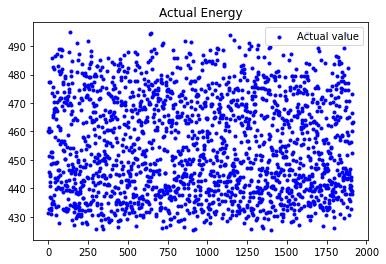

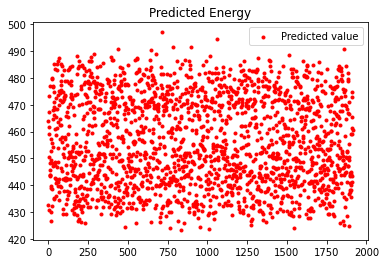

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(range(0,len(y_test)), y_test, s = 9, color ='b',label='Actual value')
plt.title('Actual Energy')
plt.legend()
plt.figure()
plt.scatter(range(0,len(y_test)), y_pred, s = 9,color ='r',label='Predicted value')
plt.title('Predicted Energy')
plt.legend()
plt.show()